In [1]:
# !pip install requests beautifulsoup4 pandas matplotlib


In [3]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt


In [5]:
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
response = requests.get(url)


In [7]:
soup = BeautifulSoup(response.text, 'html.parser')


In [9]:
table = soup.find('table')  # Get the first table on the page
rows = table.find_all('tr')  # Get all rows in the table


In [11]:
data = []
for row in rows[1:]:  # Skip the header row
    cols = row.find_all('td')  # Find all columns in the row
    if len(cols) == 7:  # Make sure the row has all the expected columns
        data.append({
            'id': int(cols[0].text.strip()),
            'terrestrial_date': cols[1].text.strip(),
            'sol': int(cols[2].text.strip()),
            'ls': float(cols[3].text.strip()),
            'month': int(cols[4].text.strip()),
            'min_temp': float(cols[5].text.strip()),
            'pressure': float(cols[6].text.strip())
        })


In [13]:
df = pd.DataFrame(data)


In [15]:
df['terrestrial_date'] = pd.to_datetime(df['terrestrial_date'])


In [17]:
num_months = df['month'].nunique()
print(f"Number of months on Mars: {num_months}")


Number of months on Mars: 12


In [19]:
num_earth_days = df['sol'].nunique()
print(f"Number of Martian days (sols) in the dataset: {num_earth_days}")


Number of Martian days (sols) in the dataset: 1867


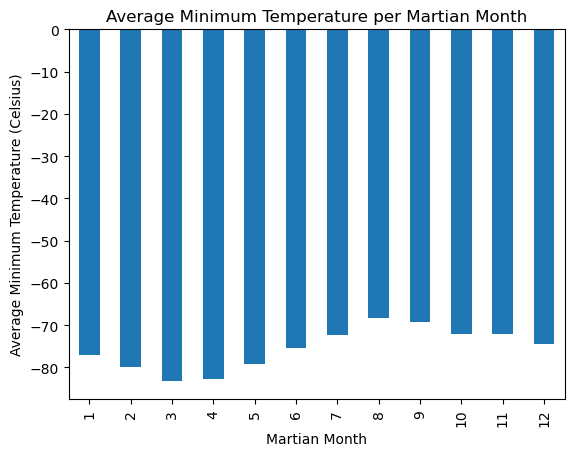

In [21]:
avg_min_temp = df.groupby('month')['min_temp'].mean()
avg_min_temp.plot(kind='bar', title='Average Minimum Temperature per Martian Month')
plt.xlabel('Martian Month')
plt.ylabel('Average Minimum Temperature (Celsius)')
plt.show()


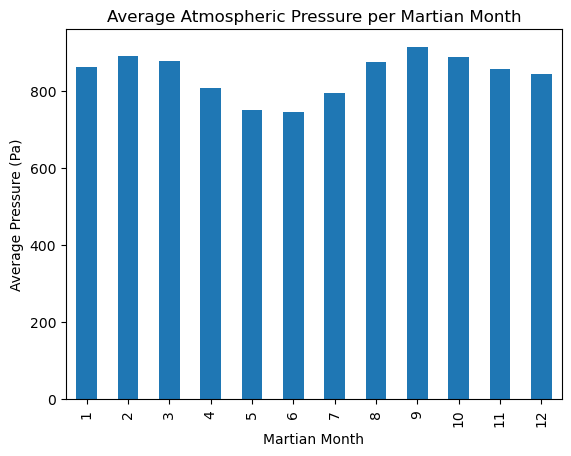

In [23]:
avg_pressure = df.groupby('month')['pressure'].mean()
avg_pressure.plot(kind='bar', title='Average Atmospheric Pressure per Martian Month')
plt.xlabel('Martian Month')
plt.ylabel('Average Pressure (Pa)')
plt.show()


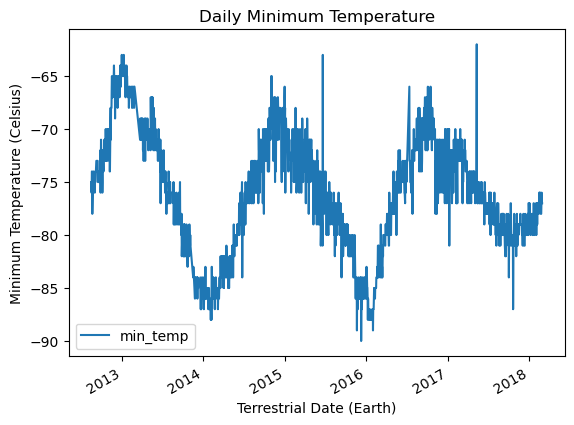

In [25]:
df.plot(x='terrestrial_date', y='min_temp', kind='line', title='Daily Minimum Temperature')
plt.xlabel('Terrestrial Date (Earth)')
plt.ylabel('Minimum Temperature (Celsius)')
plt.show()


In [27]:
df.to_csv('mars_weather_data.csv', index=False)
